In [1]:
%matplotlib inline

import urllib.request
import io
import zipfile

from pathlib import Path
import os

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import gurobipy as gp
from gurobipy import GRB

import igraph as ig

In [2]:
#url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

#sock = urllib.request.urlopen(url)  # open URL
#s = io.BytesIO(sock.read())  # read into BytesIO "file"
#sock.close()

#zf = zipfile.ZipFile(s)  # zipfile object
#txt = zf.read("football.txt").decode()  # read info file
#gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
#gml = gml.split("\n")[1:]
#G = nx.parse_gml(gml)  # parse gml data

#print(txt)
# print degree for each team - number of games
#for n, d in G.degree():
#    print(f"{n:20} {d:2}")

#options = {"node_color": "black", "node_size": 50, "linewidths": 0, "width": 0.1}

#pos = nx.spring_layout(G, seed=1969)  # Seed for reproducible layout
#nx.draw(G, pos, **options)
#plt.show()

In [3]:
#karate = ig.Graph.Read_GraphML("/home/jossian/repository/tukey_depth/src/instances/zachary.graphml")

#ig.summary(karate)

#inst_="karate"
#instance_=f"{inst_}"
#G = nx.read_gml(f"../instances/{inst_}/{instance_}.gml.gz",destringizer=int)

#n = G.vcount()
#print(n)

#m = G.ecount()
#print(m)

#len(G.cliques())

#print(G.maximal_independent_vertex_sets())
#print(nx.maximal_independent_set(G))
#igraph_maximal_independent_vertex_sets(G)

#karate.independence_number()

#karate.distances(2)
#A = nx.Graph(G)
#A = ig.Graph.from_networkx(G)
#tmp = len(A.maximal_independent_vertex_sets())
#print(tmp)

In [4]:
# instances

#G = ig.Graph.Famous("petersen")
#ig.plot(G)

#g = ig.Graph.Erdos_Renyi(n=50, p=0.2, directed=False, loops=False)
#ig.plot(g)

#inst_="example"
#G = nx.Graph()
#list0 = [0,1,2,3,4,5]
#G.add_nodes_from(list0)
#G.add_edge(0,2)
#G.add_edge(1,2)
#G.add_edge(2,3)
#G.add_edge(3,4)
#G.add_edge(4,5)

#inst_="karate"
#G = nx.karate_club_graph()
#nx.write_gml(G, f"../instances/{inst_}.gml.gz")
#nx.write_graphml(G, f"../instances/{inst_}.graphml")

#inst_="petersen"
#G = nx.petersen_graph()
#nx.write_gml(G, f"../instances/{inst_}.gml.gz")

#dim=50
#inst_=f"tree_{dim}"
#for id in range(1,11):
#    G = nx.random_tree(50)
#    nx.write_gml(G, f"../instances/{inst_}_{id}.gml.gz",stringizer=int)

#dim=500
#inst_=f"internet_graph_{dim}"
#for id in range(1,11):
#    G = nx.random_internet_as_graph(dim)
#    nx.write_gml(G, f"../instances/{inst_}_{id}.gml.gz")

# erdos_renyi_graph(n, p, seed=None, directed=False)
#G = nx.erdos_renyi_graph(50,0.1)

# barabasi_albert_graph(n, m, seed=None, initial_graph=None)
#G = nx.barabasi_albert_graph()
#nx.write_gml(G, f"../instances/{inst_}.gml.gz")

#dim=100
#inst_=f"erdos_renyi_{dim}"
#for id in range(1,11):
#    GI = ig.Graph.Erdos_Renyi(n=dim, p=0.2, directed=False, loops=False)
#    A = ig.Graph.get_edgelist(GI)
#    G = nx.Graph(A)
#    #G = ig.Graph.to_networkx(GI)
#    nx.write_gml(G, f"../instances/{inst_}_{id}.gml.gz",stringizer=int)

#inst_="les_miserables"
#G = nx.les_miserables_graph()
#nx.write_gml(G, f"../instances/{inst_}.gml.gz")

#inst_="dodecahedral_graph"
#G = nx.dodecahedral_graph()
#nx.write_gml(G, f"../instances/{inst_}.gml.gz")

#inst_="cube"
#G = nx.Graph()
#list = [0,1,2,3,4,5,6,7]
#G.add_nodes_from(list)
#G.add_edge(0,1)
#G.add_edge(0,4)
#G.add_edge(0,3)
#G.add_edge(1,2)
#G.add_edge(1,5)
#G.add_edge(2,3)
#G.add_edge(2,6)
#G.add_edge(3,7)
#G.add_edge(4,5)
#G.add_edge(4,7)
#G.add_edge(5,6)
#G.add_edge(6,7)
#nx.write_gml(G, f"../instances/{inst_}.gml.gz")

inst_="moser_spindle_modi"
G = nx.Graph()
list = [0,1,2,3,4,5,6]
G.add_nodes_from(list)
G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(0,5)
G.add_edge(0,6)
G.add_edge(1,2)
#G.add_edge(1,3)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
#G.add_edge(4,6)
G.add_edge(5,6)
nx.write_gml(G, f"../instances/{inst_}.gml.gz")


In [5]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6))

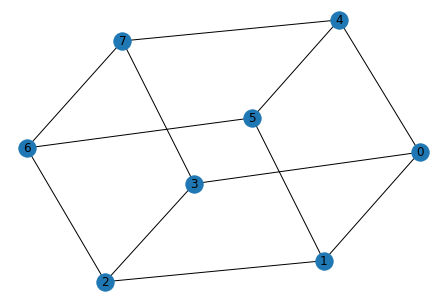

In [21]:
inst_="cube"
instance_=f"{inst_}"
G = nx.read_gml(f"../instances/{inst_}/{instance_}.gml.gz",destringizer=int)

#ig.plot(GI)
#nx.draw_networkx_labels(G,pos=nx.spring_layout(G))
nx.draw(G,  with_labels = True)

In [22]:
nx.is_connected(G)

True

In [23]:
G.number_of_nodes()

8

In [24]:
G.number_of_edges()

12

In [25]:
A = ig.Graph.from_networkx(G)
#Im = nx.maximal_independent_set(T)
Im = A.maximal_independent_vertex_sets()
print(Im)                

[(0, 2, 5, 7), (0, 6), (2, 4), (1, 3, 4, 6), (1, 7), (3, 5)]


In [28]:
Nu = nx.neighbors(G,0)
            
listNu = []
for j in Nu:
    listNu.append(j)

print(listNu)

[1, 4, 3]


1
4
3


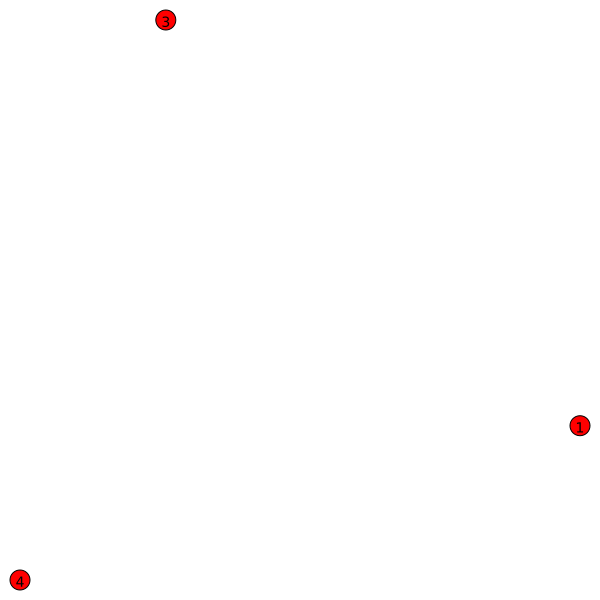

In [56]:
T = nx.Graph()
Z = ig.Graph()
T.add_nodes_from(listNu)
Z.add_vertices(listNu)

Z.vs["name"] = [1,4,3]
Z.vs["label"] = Z.vs["name"]
#del(T.vs["_nx_name"])

#print(Z)
#Z.vs

#labels_dict={0: '1', 1: '4', 2: '3'}
#labels=list(labels_dict.values())

for i in Z.vs:
    print(i["name"])


#ig.plot(Z, vertex_label =  labels)

#                for (a,b) in combinations(listNu,2):
#                    if G.has_edge(a,b):
#                        T.add_edge(a,b)
#                        Z.add_edges([(a,b)])

                #nx.draw(T,  with_labels = True)

ig.plot(Z)


In [15]:
Z = ig.Graph()

In [20]:
print(Z)

IGRAPH U--- 0 0 --


In [13]:
# maximal independent set
list_miset = A.maximal_independent_vertex_sets()

tmp = len(list_miset)
print("tam lmiset: %d" %(tmp))
if tmp > 0:
    for id in list_miset:
        print(id)
        #tmp1 = len(id)
        #print("tam item lmiset: %d " %(tmp1))
        #for id1 in id:
        #    print(id1)
        #list.append(id)
        #print(list)


tam lmiset: 7
(0, 3)
(0, 4)
(1, 3, 5)
(1, 3, 6)
(1, 4, 6)
(2, 4, 6)
(2, 5)


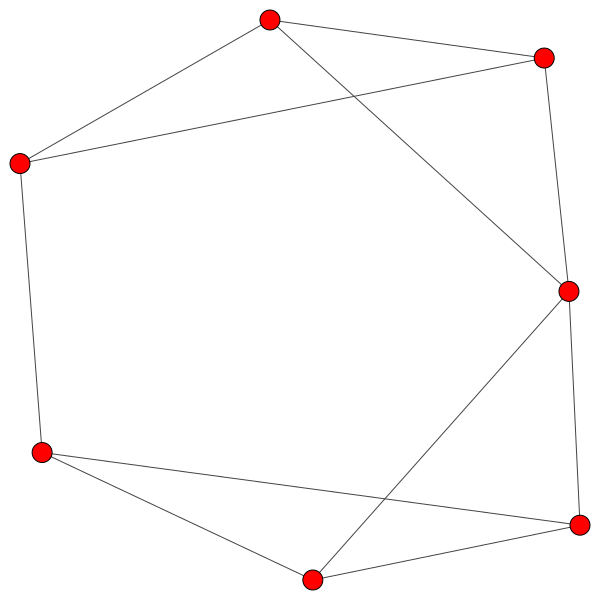

In [17]:
ig.plot(A)

In [47]:
#H = nx.read_gml(f"../instances/{inst_}.gml",destringizer=int)
H = nx.read_gml(f"../instances/{inst_}.gml.gz",destringizer=int)

In [48]:
H.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [5]:
#instance

inst_="internet_graph"
dim_=200
table = pd.DataFrame()
for id_ in range(1,11):
    list = []
    instance_=f"{inst_}_{dim_}_{id_}"
    G = nx.read_gml(f"../instances/{inst_}/{dim_}/{instance_}.gml.gz",destringizer=int)
    dados = pd.DataFrame({
        'id':id_,
        'nodes':G.number_of_nodes(),
        'edges':G.number_of_edges(),
        'diameter':nx.diameter(G)
    },index=["teste"]
    )
    table = pd.concat([table, dados], ignore_index=True)

In [6]:
table

,id,nodes,edges,diameter
0,1,200,283,5
1,2,200,284,6
2,3,200,285,6
3,4,200,273,5
4,5,200,283,6
5,6,200,280,5
6,7,200,290,5
7,8,200,289,6
8,9,200,279,6
9,10,200,281,6


In [7]:
print(table[['id',"nodes","edges","diameter"]].to_latex(index=False,float_format="%.1f"))

\begin{tabular}{rrrr}
\toprule
 id &  nodes &  edges &  diameter \\
\midrule
  1 &    200 &    283 &         5 \\
  2 &    200 &    284 &         6 \\
  3 &    200 &    285 &         6 \\
  4 &    200 &    273 &         5 \\
  5 &    200 &    283 &         6 \\
  6 &    200 &    280 &         5 \\
  7 &    200 &    290 &         5 \\
  8 &    200 &    289 &         6 \\
  9 &    200 &    279 &         6 \\
 10 &    200 &    281 &         6 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_125468/4268586788.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table[['id',"nodes","edges","diameter"]].to_latex(index=False,float_format="%.1f"))
